In [16]:
import numpy as np
import uncertainties as u
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math as m

# Data Analysis Notebook for ENPH353 Magnetic Susceptibility project

This notebook includes both the calibration and data analysis parts of our magnetic susceptibility experiment.

## Why a Gaussian fit?
First we define the general curve that we will fit to our calibration data. Although the true magnetic field profile is governed by the Biot-Savart law and may not be perfectly Gaussian, we are fitting a Gaussian curve to the calibration data due to its symmetry and simplicity. This approach is sufficient for locating the optimal position for the gauss probe as our primary concern is identifying the symmetric peak rather than modeling the exact field distribution.

In [2]:
# Now we define a gaussian function to fit the data to
def gauss(x, A, mu, sigma):
    return A*np.exp(-(x-mu)**2/(2*sigma**2))

# Now we define the function to generate our graphs and fit the data
def fitPlotGauss (xData, yData, title):
    # Fit the data to our gaussian function
    popt, pcov = curve_fit(gauss, xData, yData, p0=[1, 50, 10])

    # Generate the data points for the fit
    xFit = np.linspace(min(xData) - 10, max(xData) + 10, 100)
    yFit = gauss(xFit, *popt)

    # Plot the data
    plt.plot(xData, yData, 'ro', label='Calibration Data')
    plt.plot(xFit, yFit, 'b-', label='Fit')
    plt.xlabel('Distance (mm)')
    plt.ylabel('Field Strength (Gauss)')
    plt.title(title)
    plt.show()

    # Output the peak value and the x-value that it corresponds to
    print(f"Peak = {popt[0]:.2f} Gauss = {popt[0]/10000:.4f} Tesla")
    print(f"Peak x-value = {popt[1]}mm")

    return popt

## Calibration
An important part of our analysis is knowing the field strength at the center of our solenoids. The field strength should be at a maximum in the direct center of our solenoids. To locate the center and get field measurements from there, a calibration cycle is performed. Three amps of current is ran through the solenoids and a measurement is taken from the gauss probe at some distance from the solenoids. The field strength is recorded, then the Gauss probe is moved 2.5mm closer to the center of the solenoids. This process is repeated until the field strength measurement has returned to a sufficiently low level. The data is then plotted and a gaussian is fit so that the location of the peak magnetic field can be determined.

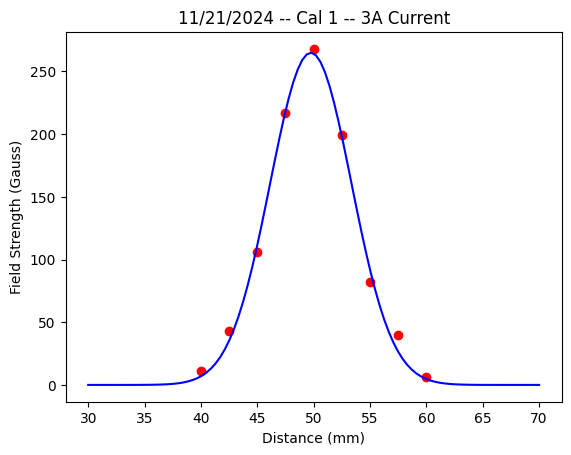

Peak = 264.97 Gauss = 0.0265 Tesla
Peak x-value = 49.74881702096415mm


In [91]:
# Set up calibration data set -- 11/21/2024 -- Cal 1 -- 3A Current
calDistance_mm = [60,
            57.5,
            55,
            52.5,
            50,
            47.5,
            45,
            42.5,
            40,
            ]

calFieldStrength_gauss_1 = np.array([46,
                       80,
                       122,
                       239,
                       308,
                       257,
                       146,
                       83,
                       51,
                       ])

_OptimalParams = fitPlotGauss(calDistance_mm, calFieldStrength_gauss_1-40, '11/21/2024 -- Cal 1 -- 3A Current')

## Using the calibration data
Now that we have found our supposed optimal probe displacement (peak x-value shown above) we need to measure the field strength for the specific currents that we will be testing at the optimal location. We made measurements from 0.5A up to 6A in 0.5A intervals. This should also validate that the peak x-value gives us the strongest part of the field.

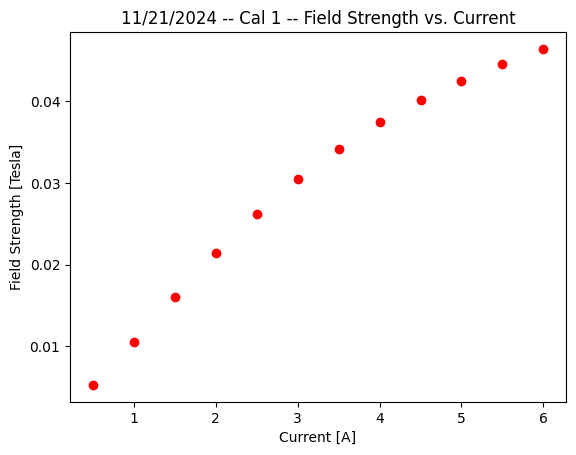

In [131]:
# This is field strength measurement data for the CAL 1 dataset

solenoidCurrent_A = np.array([0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6])

fieldStrengthMeasurements_T_Cal1 = np.array([
                                    0.0053,
                                    0.0106,
                                    0.0161,
                                    0.0214,
                                    0.0262,
                                    0.0305,
                                    0.0342,
                                    0.0374,
                                    0.0401,
                                    0.0425,
                                    0.0446,
                                    0.0464,
                                    ])

fieldStrengthMeasurements_T_Cal2 = np.array([
                                    0.0068,
                                    0.0119,
                                    0.0173,
                                    0.0226,
                                    0.0278,
                                    0.0313,
                                    0.0349,
                                    0.0428,
                                    0.0437,
                                     0.0464,
                                    ])

# Plot the data
plt.plot(solenoidCurrent_A, fieldStrengthMeasurements_T_Cal1, 'ro', label='Data')
plt.xlabel('Current [A]')
plt.ylabel('Field Strength [Tesla]')
plt.title('11/21/2024 -- Cal 1 -- Field Strength vs. Current')
plt.show()

The shape of this data is interesting as it looks like there are basically two different linear regimes. One from 0.5A to ~2.5A, and another from ~4.5 and up. Lets fit some lines to this.

First Linear Regime: m = 0.0108 b = -0.0001
Second Linear Regime: m = 0.0042 b = 0.0214


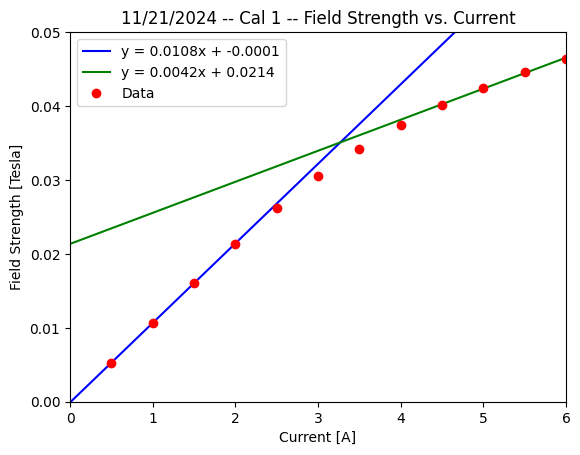

In [132]:
firstLinearRegimeCurrent_A = solenoidCurrent_A[:4]
firstLinearRegimeFields_T = fieldStrengthMeasurements_T_Cal1[:4]

secondLinearRegimeCurrent_A = solenoidCurrent_A[-4:]
secondLinearRegimeFields_T = fieldStrengthMeasurements_T_Cal1[-4:]

# Fit the data to a linear function
def linear(x, m, b):
    return m*x + b

# Fit the first linear regime
poptCobalt, pcov = curve_fit(linear, firstLinearRegimeCurrent_A, firstLinearRegimeFields_T)
xFit = np.linspace(0, 6, 40)
yFit = linear(xFit, *poptCobalt)

print(f"First Linear Regime: m = {poptCobalt[0]:.4f} b = {poptCobalt[1]:.4f}")

# Plot the first linear regime
plt.plot(xFit, yFit, 'b-', label=f'y = {poptCobalt[0]:.4f}x + {poptCobalt[1]:.4f}')

# Fit the second linear regime
poptCobalt, pcov = curve_fit(linear, secondLinearRegimeCurrent_A, secondLinearRegimeFields_T)
xFit = np.linspace(0, 6, 40)
yFit = linear(xFit, *poptCobalt)

print(f"Second Linear Regime: m = {poptCobalt[0]:.4f} b = {poptCobalt[1]:.4f}")

# Plot the second linear regime
plt.plot(xFit, yFit, 'g-', label=f'y = {poptCobalt[0]:.4f}x + {poptCobalt[1]:.4f}')

plt.plot(solenoidCurrent_A, fieldStrengthMeasurements_T_Cal1, 'ro', label='Data')

plt.xlabel('Current [A]')
plt.ylabel('Field Strength [Tesla]')
plt.title('11/21/2024 -- Cal 1 -- Field Strength vs. Current')

plt.xlim(0, 6)
plt.ylim(0, 0.05)

plt.legend()
plt.show()

My guess at whats causing this is that we are hitting the saturation field strength for the core material we are using so the benefits of having the core diminish as the field generated by just the current in the solenoid decreases. Further analysis is required to validate this idea but it is the leading theory for why this is happening.

## Taking mass change data
Our field strengths and setup were really only strong enough to see mass changes in nickel and cobalt, two ferromagnetic materials. Our supporting structure wasn't strong enough to resist the attraction of our iron sample to the magnetic field so we were constantly contacting the supporting solenoids even at very low currents. For nickel we manages to get 5 readings between 0.5 and 2.5A before it contacted the solenoids. 

## **Acknowledgement**

**As ferromagnetic materials are affected by magnetic hysteresis, there is not really a static magnetic susceptibility that can be calculated for them. Instead, the analysis performed on the data below is representative of how a paramagnetic material would be analyzed. The end value calculated is meaningless, however the process is correct for if the setup was scaled to be able to accomodate paramagnetic and diamagnetic materials. The field strengths these correlate to are squared and plotted against the apparent mass change measured by the scale.** 


y = (5.7272+/-0.2379)e-02x + 3.9293e-06
Slope = 0.0573+/-0.0024 kg/T^2


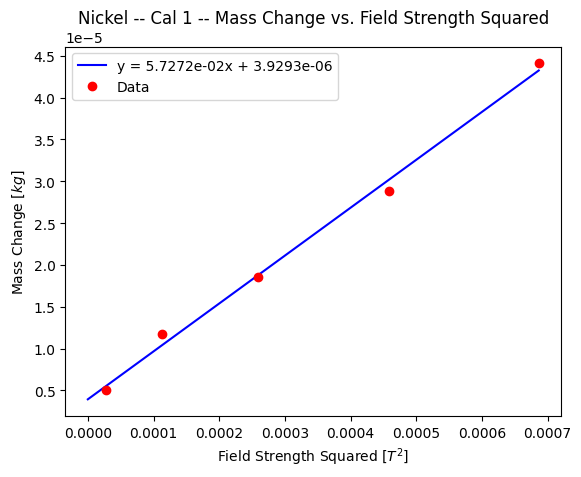

In [133]:
# First we analyze the data from Nickel 

nickelSquaredFieldVals_T = np.array(fieldStrengthMeasurements_T_Cal1[:5])**2
nickelMassChanges_kg = np.array([0.005, 0.0117, 0.0185, 0.0288, 0.0441])/1000 # Original data is in grams

# Measurement errors
mass_error_kg = 0.0002 / 1000  # Convert grams to kilograms
field_error_T = 0.00005

# Propagate the field strength errors to the squared field values
field_squared_error_T2 = 2 * nickelSquaredFieldVals_T * field_error_T

# Combine the errors (assuming they are independent)
combined_errors = np.sqrt(mass_error_kg**2 + field_squared_error_T2**2)

# Fit the data to a linear function
poptNickel, pcov = curve_fit(linear, nickelSquaredFieldVals_T, nickelMassChanges_kg, sigma=combined_errors)

# Extract the slope and its error
nickelSlope_kg_T2 = poptNickel[0]
slope_error = np.sqrt(pcov[0, 0])

nickelSlope_kg_T2 = u.ufloat(nickelSlope_kg_T2, slope_error)

xFit = np.linspace(0, max(nickelSquaredFieldVals_T), 40)
yFit = linear(xFit, *poptNickel)

print(f"y = {nickelSlope_kg_T2:.4e}x + {poptNickel[1]:.4e}")
print(f"Slope = {nickelSlope_kg_T2:.4f} kg/T^2")

plt.plot(xFit, yFit, 'b-', label=f'y = {poptNickel[0]:.4e}x + {poptNickel[1]:.4e}')
plt.plot(nickelSquaredFieldVals_T, nickelMassChanges_kg, 'ro', label='Data')

plt.xlabel('Field Strength Squared $[T^2]$')
plt.ylabel('Mass Change $ [kg] $')
plt.title('Nickel -- Cal 1 -- Mass Change vs. Field Strength Squared')

plt.legend()
plt.show()

y = (2.2574+/-0.1145)e-01x + 1.3445e-05
Slope = (2.2574+/-0.1145)e-01 kg/T^2


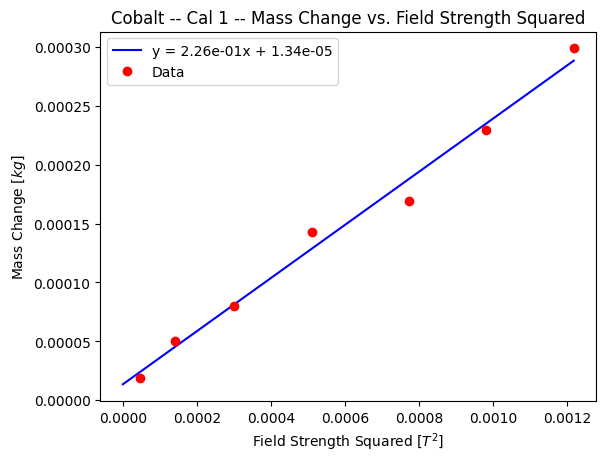

In [134]:
# Now the cobalt data

cobaltSquaredFieldVals_T = np.array(fieldStrengthMeasurements_T_Cal2[:7])**2
cobaltMassChanges_kg = np.array([0.0188, 0.0502, 0.0804, 0.1432, 0.1691, 0.2297, 0.2989])/1000 # Original data is in grams

# Measurement errors
mass_error_kg = 0.0002 / 1000  # Convert grams to kilograms
field_error_T = 0.00005

# Propagate the field strength errors to the squared field values -- multiplied by two because of the squaring
field_squared_error_T2 = 2 * cobaltSquaredFieldVals_T * field_error_T

# Combine the errors (assuming they are independent) -- Adding in quadrature
combined_errors = np.sqrt(mass_error_kg**2 + field_squared_error_T2**2)

# Fit the data to a linear function
poptCobalt, pcov = curve_fit(linear, cobaltSquaredFieldVals_T, cobaltMassChanges_kg, sigma=combined_errors)

# Extract the slope and its error
cobaltSlope_kg_T2 = poptCobalt[0]
cobaltSlope_error = np.sqrt(pcov[0, 0])

cobaltSlope_kg_T2 = u.ufloat(cobaltSlope_kg_T2, cobaltSlope_error)

xFit = np.linspace(0, max(cobaltSquaredFieldVals_T), 40)
yFit = linear(xFit, *poptCobalt)

print(f"y = {cobaltSlope_kg_T2:.4e}x + {poptCobalt[1]:.4e}")
print(f"Slope = {cobaltSlope_kg_T2:.4e} kg/T^2")

plt.plot(xFit, yFit, 'b-', label=f'y = {poptCobalt[0]:.2e}x + {poptCobalt[1]:.2e}')
plt.plot(cobaltSquaredFieldVals_T, cobaltMassChanges_kg, 'ro', label='Data')

plt.xlabel('Field Strength Squared $[T^2]$')
plt.ylabel('Mass Change $ [kg] $')
plt.title('Cobalt -- Cal 1 -- Mass Change vs. Field Strength Squared')

plt.legend()
plt.show()

Now we check the residuals to see how correct this linear fit is.

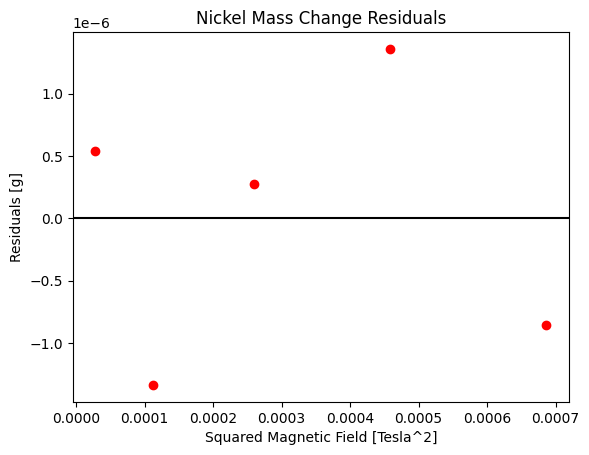

In [135]:
# Nickel Residuals

residuals = linear(nickelSquaredFieldVals_T, *poptNickel) - nickelMassChanges_kg

plt.plot(nickelSquaredFieldVals_T, residuals, 'ro')

# Plot a center line at x = 0
plt.axhline(0, color='black')

plt.xlabel('Squared Magnetic Field [Tesla^2]')
plt.ylabel('Residuals [g]')
plt.title('Nickel Mass Change Residuals')

plt.show()

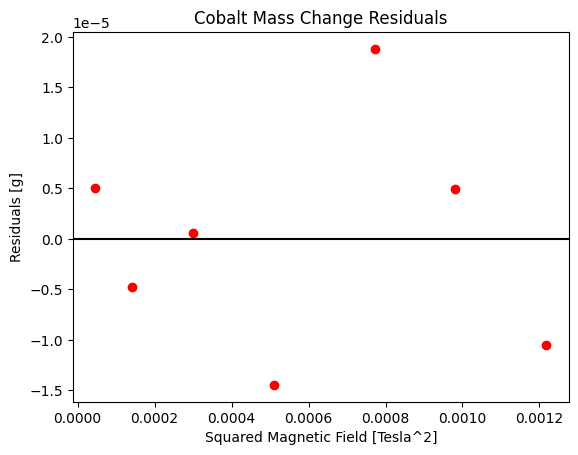

In [136]:
# Nickel Residuals

residuals = linear(cobaltSquaredFieldVals_T, *poptCobalt) - cobaltMassChanges_kg

plt.plot(cobaltSquaredFieldVals_T, residuals, 'ro')

# Plot a center line at x = 0
plt.axhline(0, color='black')

plt.xlabel('Squared Magnetic Field [Tesla^2]')
plt.ylabel('Residuals [g]')
plt.title('Cobalt Mass Change Residuals')

plt.show()

These residuals seem randomly distributed so our linear seems fine. Ideally more data points would've been collected to confirm this behaviour, however since the math shows this should be a linear plot, we can say with some pretty good confidence that the fit is good.

## Final calculation and Error Propagation

No we use the derived equations to determine the magnetic susceptibility of the sample:
$$
\chi_m = \frac{2 \mu_0 \Delta m g}{A H^2}
$$

Where $\chi_m$ is the relative susceptibility of the sample, $\mu_0$ is the permeability of free space, $g$ is gravitational acceleration, $A$ is the cross-sectional area of the sample, and $\Delta \frac{m}{H^2}$ is the slope of the plot of mass change.

The constants used are as follows:

| Constant | Value | Units |
|----------|-------|-------|
| $\mu_0$  | $4 \pi \times 10^{-7}$ | $\frac{m kg}{s^2 A^2}$
| $g$  | $9.81$ | $\frac{m}{s^2}$|

For our samples the measurable quantities are shown in the table below:

| Material | Thickness [mm] | Width [mm] | Area [m^2]   |
|----------|-------------|------------|---------------------|
| Nickel   | $0.2$       | $25.4$       | $5.1 \times 10^{-6}$    |
| Cobalt   | $1$         | $12.86$      | $1.286 \times 10^{-5}$  |

With all caliper measurements having an error of $\pm 0.02$ mm. 

With these values we then calculate the relative susceptibility of our samples.

In [137]:
def relativeSusceptibility (crossSectionalArea_m2, massFieldSlope):
    g = 9.81
    u_0 = 4*m.pi*10**-7
    return 2*u_0*g*massFieldSlope/crossSectionalArea_m2

nickelThickness_m = u.ufloat(0.2/1000, 0.02/1000) # Measurements originally in mm
nickelWidth_m = u.ufloat(25.4/1000, 0.02/1000) # Measurements originally in mm

nickelArea_m = nickelThickness_m * nickelWidth_m

print(f"Nickel Area = {nickelArea_m} m^2")

cobaltThickness_m = u.ufloat(1/1000, 0.02/1000) # Measurements originally in mm
cobaltWidth_m = u.ufloat(12.86/1000, 0.02/1000) # Measurements originally in mm

cobaltArea_m = cobaltThickness_m * cobaltWidth_m

print(f"Cobalt Area = {cobaltArea_m} m^2")

Nickel Area = (5.1+/-0.5)e-06 m^2
Cobalt Area = (1.286+/-0.026)e-05 m^2


In [138]:
nickelSusceptibility = relativeSusceptibility (nickelArea_m, nickelSlope_kg_T2)
cobaltSusceptibility = relativeSusceptibility (cobaltArea_m, cobaltSlope_kg_T2)

print(f"The calculated relative susceptibility of Nickel is {nickelSusceptibility}")
print(f"The calculated relative susceptibility of Cobalt is {cobaltSusceptibility}")

The calculated relative susceptibility of Nickel is 0.278+/-0.030
The calculated relative susceptibility of Cobalt is 0.433+/-0.024


## Calculating required fields for para and diamagnetic materials

Since we were unable to collect data on the paramagnetic and diamagnetic materials, we should do some calculations to determine what field strengths would be required to see similar changes in mass in these samples under similar test circumstances to the ferromagnetic ones.

For these calculations we took the dimensions of our theoretical samples to be similar to our cobalt sample, and assumed we were looking for a mass change of 0.01g, a similar order of magnitude as the ferromagnetic samples.

To complete these calculations we need to rearrange to solve for $H$ from our above equation.

$$
H = \sqrt{\frac{2 \mu_0 \Delta m g}{\chi_m A}}
$$

In [139]:
def getRequiredField (susceptibility, massChange_g=0.01, crossSection=cobaltArea_m):
    u_0 = 4*m.pi*10**-7
    g=9.81

    return ((2*u_0*(massChange_g/1000)*g)/(abs(susceptibility)*crossSection))**0.5

# Paramagnetic Materials
aluminumSusceptibility = 1.65e-5
titaniumSusceptibility = 1.51e-4

# Diamagnetic Materials
copperSusceptibility = -5.46e-6
tinSusceptibility = -3.74e-5


# Calculate the required field for a 0.01g mass change
print("Paramagnetic Materials --------|")
print(f"The required field for a 0.01g mass change in Aluminum is {getRequiredField(aluminumSusceptibility)} Tesla")
print(f"The required field for a 0.01g mass change in Titanium is {getRequiredField(titaniumSusceptibility)} Tesla")

print("\nDiamagnetic Materials --------|")
print(f"The required field for a 0.01g mass change in Copper is {getRequiredField(copperSusceptibility)} Tesla")
print(f"The required field for a 0.01g mass change in Tin is {getRequiredField(tinSusceptibility)} Tesla")


Paramagnetic Materials --------|
The required field for a 0.01g mass change in Aluminum is 1.078+/-0.011 Tesla
The required field for a 0.01g mass change in Titanium is 0.356+/-0.004 Tesla

Diamagnetic Materials --------|
The required field for a 0.01g mass change in Copper is 1.874+/-0.019 Tesla
The required field for a 0.01g mass change in Tin is 0.716+/-0.007 Tesla
